## Introduction

German credit rating dataset is provided by Prof. Hofmann, contains categorical/symbolic attributes of the persons who availed the credit and the current status of the credit (at the time when the dataset is prepared). The status of the credit is indicated by 1 for good credits and 2 for bad credits.

The dataset used in this exercise is downloaded from UCI Repository.

https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

The detailed description of variables can be found at the same link.

## Objective

- Load the dataset
- Create dummy variables for the categorical features
- Specify X and y features
- Split datasets into train and test datasets
- Build a logistic regression model
- Find significant variables
- Create confusion matrix to find out Sensitivity and specificity
- Draw ROC Plot
- Find optimal cutoff probability using yoden's index
- Find optimal cutoff probability using cost

### Instructions:

- To complete the worksheet, fill the sections as per the ##TODO instructions given
- Replace the 'None' with appropriate code

## Loading the dataset

In [148]:
import pandas as pd
import numpy as np

In [149]:
## TODO: Fill the dataset filename
credit_df = pd.read_csv( '../data/German Credit Data.csv' )

In [150]:
## TODO: Display the first few records
credit_df[0:5]

,checkin_acc,duration,credit_history,amount,svaing_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [151]:
## TODO: Get the column names
credit_df.columns

Index(['checkin_acc', 'duration', 'credit_history', 'amount', 'svaing_acc',
       'present_emp_since', 'inst_rate', 'personal_status', 'residing_since',
       'age', 'inst_plans', 'num_credits', 'job', 'status'],
      dtype='object')

In [152]:
## TODO: Get the information about columns and datatypes
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
checkin_acc          1000 non-null object
duration             1000 non-null int64
credit_history       1000 non-null object
amount               1000 non-null int64
svaing_acc           1000 non-null object
present_emp_since    1000 non-null object
inst_rate            1000 non-null int64
personal_status      1000 non-null object
residing_since       1000 non-null int64
age                  1000 non-null int64
inst_plans           1000 non-null object
num_credits          1000 non-null int64
job                  1000 non-null object
status               1000 non-null int64
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


### How many default and no default observations in the sample

In [153]:
## TODO

default = credit_df[credit_df.status == 0]

There are about 300 defaults and 700 non-default observations

## Creating Dummy Features

In [154]:
credit_df.columns

Index(['checkin_acc', 'duration', 'credit_history', 'amount', 'svaing_acc',
       'present_emp_since', 'inst_rate', 'personal_status', 'residing_since',
       'age', 'inst_plans', 'num_credits', 'job', 'status'],
      dtype='object')

In [155]:
list( credit_df.columns )

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'svaing_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job',
 'status']

### Select Independent Variables

In [156]:
X_features = list( credit_df.columns )
X_features.remove( 'status' )
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'svaing_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [157]:
## TODO : Create dummy features
encoded_credit_df = pd.get_dummies(credit_df[X_features] , drop_first= True)

In [158]:
encoded_credit_df.columns

Index(['duration', 'amount', 'inst_rate', 'residing_since', 'age',
       'num_credits', 'checkin_acc_A12', 'checkin_acc_A13', 'checkin_acc_A14',
       'credit_history_A31', 'credit_history_A32', 'credit_history_A33',
       'credit_history_A34', 'svaing_acc_A62', 'svaing_acc_A63',
       'svaing_acc_A64', 'svaing_acc_A65', 'present_emp_since_A72',
       'present_emp_since_A73', 'present_emp_since_A74',
       'present_emp_since_A75', 'personal_status_A92', 'personal_status_A93',
       'personal_status_A94', 'inst_plans_A142', 'inst_plans_A143', 'job_A172',
       'job_A173', 'job_A174'],
      dtype='object')

### Set the Response Variable and Independent Variables

In [159]:
Y = credit_df.status
X = encoded_credit_df

## Splitting Datasets into Train and Test Sets

In [160]:
from sklearn.model_selection import train_test_split

## TODO: Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3 , random_state = 42)

In [161]:
X_train[0:2]

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
541,24,2032,4,4,60,2,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
440,12,1884,4,4,39,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1


## Building a Logistic Regression Model

In [162]:
import statsmodels.api as sm

sm.add_constant(X_train)[0:2]

,const,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
541,1.0,24,2032,4,4,60,2,0,0,1,...,0,1,0,1,0,0,1,0,1,0
440,1.0,12,1884,4,4,39,1,0,0,1,...,0,1,0,1,0,0,1,0,0,1


In [163]:
## TODO: Build the logit model. Add a constant term to X
logit = sm.Logit( y_train,sm.add_constant(X_train) )

In [164]:
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


In [165]:
## TODO: Print summary for the model
lg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   status            AIC:               744.5132  
Date:                 2017-09-15 15:02  BIC:               881.0456  
No. Observations:     700               Log-Likelihood:    -342.26   
Df Model:             29                LL-Null:           -426.75   
Df Residuals:         670               LLR p-value:       1.0630e-21
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
svaing_acc_A62        -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
svaing_acc_A63        -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
svaing_acc_A64        -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
svaing_acc_A65        -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

### Find the significant variables

In [166]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [167]:
## TODO: Get the significant variables
significant_vars = get_significant_vars(lg)

In [168]:
significant_vars

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'svaing_acc_A65']

### Final Model after selecting significant variables

In [169]:
final_logit = sm.Logit( y_train, sm.add_constant( X_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


In [170]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.161     
Dependent Variable:  status           AIC:              733.8898  
Date:                2017-09-15 15:02 BIC:              774.8495  
No. Observations:    700              Log-Likelihood:   -357.94   
Df Model:            8                LL-Null:          -426.75   
Df Residuals:        691              LLR p-value:      7.4185e-26
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
svaing_acc_A65     -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

### Interpreting the results

## Predict Test Data and Measure Accuracy

In [171]:
from sklearn import metrics

In [172]:
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test, 
                               "predicted_prob": model.predict( sm.add_constant( X_test[significant_vars] ) ) } )    
    return y_pred_df

In [173]:
## TODO: Get the predicted probabilities 
y_pred_df = get_predictions(y_test, final_logit)

#### Status_1 columns provides the predicted probability for the default classes

In [174]:
y_pred_df[0:10]

,actual,predicted_prob
521,1,0.452449
737,0,0.491820
740,0,0.418416
660,0,0.270285
411,0,0.132119
678,0,0.388392
626,0,0.154052
513,0,0.521960
859,0,0.099708
136,0,0.249919


### Assuming default if probability is more than 0.5 

In [175]:
## TODO: Set the new column 'predicted' to 1 if predicted probabilities is more than 0.5 or 0 if less then 0.5
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x : 1 if(x > 0.5) else 0)

In [176]:
y_pred_df[0:10]

,actual,predicted_prob,predicted
521,1,0.452449,0
737,0,0.491820,0
740,0,0.418416,0
660,0,0.270285,0
411,0,0.132119,0
678,0,0.388392,0
626,0,0.154052,0
513,0,0.521960,1
859,0,0.099708,0
136,0,0.249919,0


### Build a Confusion Matrix

In [177]:
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline

In [178]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

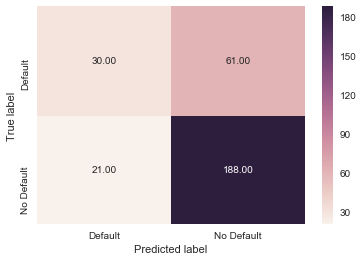

In [179]:
## TODO: Create the confusion matrix
draw_cm(y_pred_df.actual, y_pred_df.predicted)

#### Note: the model could only predict very few default classes.

### Overall accuracy of the model

In [180]:
## TODO: Calculate Total Accuracy, Precision and Recall

print( 'Total Accuracy : ',np.round( metrics.accuracy_score(y_pred_df.actual,y_pred_df.predicted ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score(y_pred_df.actual,y_pred_df.predicted ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score(y_pred_df.actual,y_pred_df.predicted), 2 ) )

cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [1,0] )

## TODO: Calculate Sensitivity
sensitivity = cm[0,0]/ (cm[0,0] + cm[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

## TODO: Calculate specificity
specificity = cm[1,1]/ (cm[1,0] + cm[1,1])
print('Specificity : ', round( specificity, 2 ) )

Total Accuracy :  0.73
Precision :  0.59
Recall :  0.33
Sensitivity :  0.33
Specificity :  0.9


In [181]:
metrics.accuracy_score(y_pred_df.actual, y_pred_df.predicted)

0.72666666666666668

## Predicted Probability distribution Plots for Defaults and Non Defaults

In [182]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

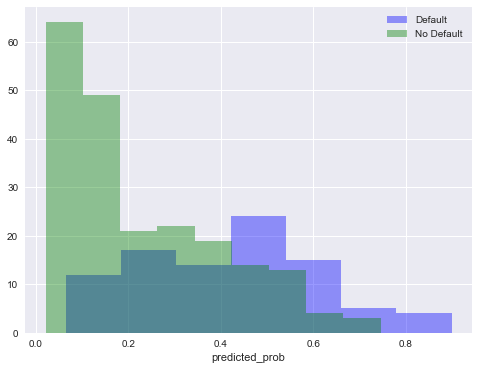

In [183]:
## TODO: Set the distribution plots for predicted probabilities for default or no default cases
plt.figure( figsize = (8,6) )
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], kde=False, color = 'b', label = 'Default' )
sn.distplot(  y_pred_df[y_pred_df.actual == 0]["predicted_prob"], kde=False, color = 'g', label = 'No Default' )
plt.legend()
plt.show()

In [184]:
## TODO: Get the accuracy score
auc_score = metrics.roc_auc_score(y_pred_df.actual, y_pred_df.predicted_prob)
round( float( auc_score ), 2 )

0.78

In [185]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr, tpr, thresholds

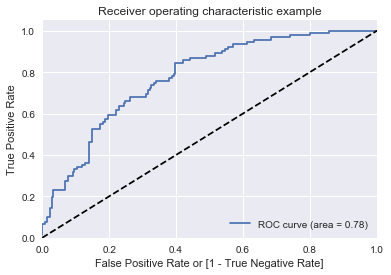

In [186]:
## TODO: Plot the ROC Curve
fpr, tpr, thresholds = draw_roc(y_pred_df.actual, y_pred_df.predicted_prob)

## Finding Optimal Cutoff Probability

In [187]:
thresholds[0:10]

array([ 0.89868909,  0.83309319,  0.81232217,  0.7920257 ,  0.75207716,
        0.75153164,  0.74543458,  0.69311282,  0.68904001,  0.67957313])

In [188]:
fpr[0:10]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.00478469,  0.00956938,  0.00956938,  0.01435407])

In [189]:
tpr[0:10]

array([ 0.01098901,  0.02197802,  0.03296703,  0.04395604,  0.05494505,
        0.06593407,  0.06593407,  0.06593407,  0.07692308,  0.07692308])

### Find optimal cutoff using youden's index

- Youden's index is where (Sensitivity+Specificity - 1) is maximum.
- That is when (TPR+TNR -1) is maximum. 
    - max( TPR - (1 - TNR) )
    - max( TPR - FPR )

In [190]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds } )
## TODO: Calculate tpr - fpr
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr 
tpr_fpr.sort_values( 'diff', ascending = False )[0:10]

,fpr,thresholds,tpr,diff
159,0.397129,0.221534,0.846154,0.449025
160,0.401914,0.216531,0.846154,0.444240
161,0.406699,0.215591,0.846154,0.439455
158,0.397129,0.223980,0.835165,0.438036
165,0.421053,0.207107,0.857143,0.436090
162,0.411483,0.211811,0.846154,0.434671
166,0.425837,0.201747,0.857143,0.431306
163,0.416268,0.211267,0.846154,0.429886
170,0.440191,0.186966,0.868132,0.427940
157,0.397129,0.226377,0.824176,0.427047


In [191]:
## TODO: Predicted if default or not, based on optimal cutoff probabilties
y_pred_df['predicted_new'] =y_pred_df.predicted_prob.map( lambda x : 1 if(x > 0.22) else 0)

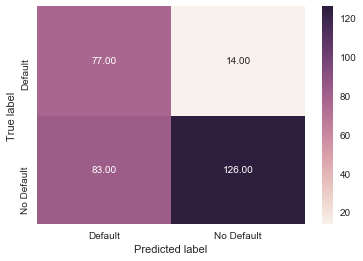

Sensitivity :  0.85
Specificity :  0.6
Total Accuracy :  0.68
Precision :  0.48
Recall :  0.85


In [192]:
## TODO: Draw the confusion matrix
draw_cm(y_pred_df.actual, y_pred_df.predicted_new)

cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted_new, [1,0] )

## TODO: Calculate Sensitivity
sensitivity = cm[0,0]/ (cm[0,0] + cm[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

## TODO: Calculate specificity
specificity = cm[1,1]/ (cm[1,0] + cm[1,1])
print('Specificity : ', round( specificity, 2 ) )

print( 'Total Accuracy : ',np.round( metrics.accuracy_score(y_pred_df.actual,y_pred_df.predicted_new ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score(y_pred_df.actual,y_pred_df.predicted_new ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score(y_pred_df.actual,y_pred_df.predicted_new), 2 ) )

### Find optimal cutoff probability using cost 

In [193]:
cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted_new, [1,0] )

In [194]:
cm_mat = np.array( cm )

In [195]:
cm

array([[ 77,  14],
       [ 83, 126]])

In [196]:
cm_mat[1, 0]

83

In [197]:
cm_mat[0, 1]

14

In [198]:
def get_total_cost( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    cm_mat = np.array( cm )
    ## TODO: Calculate the cost
    return cm_mat[0,1] * 3 + cm_mat[1,0] *1

In [199]:
get_total_cost( y_pred_df.actual, y_pred_df.predicted_new )

125

In [200]:
cost_df = pd.DataFrame( columns = ['prob', 'cost'])

In [201]:
idx = 0
for each_prob in range( 10, 50):
    cost = get_total_cost( y_pred_df.actual, 
                          y_pred_df.predicted_prob.map( 
            lambda x: 1 if x > (each_prob/100)  else 0) )
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

In [202]:
cost_df.sort_values( 'cost', ascending = True )[0:5]

,prob,cost
12,0.22,125.0
10,0.20,128.0
11,0.21,129.0
9,0.19,130.0
8,0.18,135.0


In [203]:
## TODO: Calculate the predicted labels based on the optimal cutoff probabilities
y_pred_df['predicted_final'] = y_pred_df.predicted_prob.map( lambda x : 1 if(x > 0.22) else 0)

In [204]:
## TODO: Draw the confusion matrix

#### Note:

Predicting *Defaults* as *No Defaults* have been minimized.

In [205]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted_final ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted_final ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted_final ), 2 ) )

cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted_final, [1,0] )

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Total Accuracy :  0.68
Precision :  0.48
Recall :  0.85
Sensitivity :  0.85
Specificity :  0.6


#### Note:

Total accuracy of the model is 67%, becuase the objective is not to improve total accuracy but minimize the quadrants that contribute to the cost.